In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [57]:
import pandas as pd

df = pd.read_csv('data/digit-recognizer/train.csv')

In [58]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print(df.shape)  

(42000, 785)


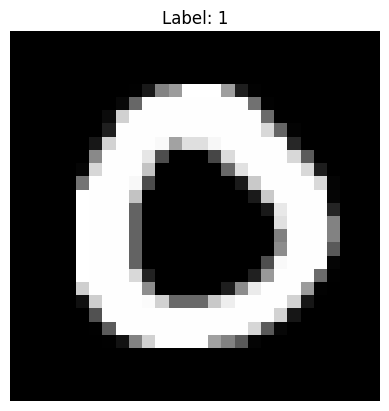

In [60]:
sample = df.iloc[4, 1:].values.reshape(28, 28)
plt.imshow(sample, cmap="gray")
plt.title(f"Label: {df.iloc[0, 0]}")
plt.axis("off")
plt.show()

In [61]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [62]:
data.shape

(42000, 785)

In [98]:
X_train = X_train.astype(np.float32) / 255.0   # scale 0‒1
X_dev   = X_dev.astype(np.float32)  / 255.0
Y_train = Y_train.astype(int)
Y_dev   = Y_dev.astype(int)

In [ ]:
H = 128              # hidden-layer width (was 10)

def init_params():
    W1 = np.random.randn(H, 784) * np.sqrt(2/784)   # He init
    b1 = np.zeros((H, 1))
    W2 = np.random.randn(10, H) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2
def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    expZ    = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T  # (10 × m)

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)              # (10 × m)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2 @ A1.T            # @ same as dot
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T @ dZ2 * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1 @ X.T
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



In [93]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, epochs=5, lr=0.01, batch_size=256):
    W1, b1, W2, b2 = init_params()
    m = Y.size
    for epoch in range(epochs):
        perm = np.random.permutation(m)
        X, Y = X[:, perm], Y[perm]
        for k in range(0, m, batch_size):
            X_batch = X[:, k:k+batch_size]
            Y_batch = Y[k:k+batch_size]

            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,
                                           W2, X_batch, Y_batch)
            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2

        # monitor once per epoch
        _, _, _, A2_full = forward_prop(W1, b1, W2, b2, X)
        acc = get_accuracy(get_predictions(A2_full), Y)
        print(f"Epoch {epoch+1}/{epochs}  —  accuracy {acc:.3f}")
    return W1, b1, W2, b2

In [94]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train)

[0 9 6 ... 7 3 0] [0 4 1 ... 7 2 0]
Epoch 1/5  —  accuracy 0.713
[8 7 9 ... 0 4 0] [8 7 9 ... 0 4 0]
Epoch 2/5  —  accuracy 0.786
[2 1 9 ... 0 3 0] [2 5 9 ... 0 3 0]
Epoch 3/5  —  accuracy 0.821
[2 9 9 ... 6 1 7] [2 9 9 ... 6 1 7]
Epoch 4/5  —  accuracy 0.840
[6 6 6 ... 5 2 1] [6 6 6 ... 5 9 1]
Epoch 5/5  —  accuracy 0.852


In [82]:
print(W1, b1, W2, b2)

[[ 0.02626089 -0.09876677 -0.05131051 ...  0.08179692  0.01750947
  -0.03333504]
 [-0.01832373 -0.0216236   0.01656786 ... -0.02304592 -0.02752254
  -0.01215886]
 [-0.08051334 -0.02301869 -0.05592789 ... -0.01816648 -0.02559329
   0.0469114 ]
 ...
 [-0.04589349  0.03536018 -0.10489766 ...  0.04900123  0.02521958
   0.01720976]
 [-0.03288019 -0.0078178  -0.00104348 ... -0.02814349 -0.02521238
   0.05385267]
 [ 0.0134132   0.08389893  0.04033828 ... -0.07146904 -0.00166833
   0.01959339]] [[ 0.0135912 ]
 [ 0.03883805]
 [ 0.00839617]
 [ 0.00125607]
 [ 0.01800186]
 [ 0.01949742]
 [ 0.02394409]
 [ 0.01932593]
 [ 0.0019429 ]
 [ 0.00302926]
 [ 0.00132078]
 [-0.00214808]
 [ 0.01226472]
 [ 0.01660645]
 [ 0.01048606]
 [ 0.03966583]
 [ 0.01617531]
 [ 0.00716206]
 [ 0.02534507]
 [ 0.01632193]
 [ 0.02071769]
 [ 0.01004119]
 [ 0.00878863]
 [ 0.00108162]
 [ 0.00672237]
 [ 0.0088953 ]
 [ 0.01671762]
 [ 0.01159474]
 [ 0.01542837]
 [ 0.0187866 ]
 [ 0.01781603]
 [ 0.00162667]
 [ 0.0126507 ]
 [ 0.01534778